In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

mpl.style.use('seaborn')
%matplotlib inline

### Criterios del registro
    #RenuncieFiscal
    #VigiliaFiscal
    #FueraNestorHumbertoMartinez
    #fiscalcorrupto
    #OyeFiscalRENUNCIA
    #29E
    #29ERenuncieFiscal
    #29EVamosPorElFiscal
    #HoyMePlantoContraElFiscal

# Loader


In [2]:
#get users and mentions from the download files:
tweets_datas_path = ["renunfis_tweets_0.json"]
tw_id=[]
tw_user_id=[]
tw_user=[]
# tw_text=[]
entities_long=[]
mentioned_ids=[]
tw_device=[]# print(twits[rnd_ind]["source"])
tw_date=[]# print(twits[rnd_ind]["created_at"])


for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
#                 if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
#                     tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                     tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                     entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                 else:
#                     if tweet["text"][0:2]=="RT":
#                         if tweet["retweeted_status"]["truncated"]:
#                             tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                         else: 
#                             tw_text_loop=[tweet["retweeted_status"]["text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
#                         if tweet["retweeted_status"]["is_quote_status"]:
#                             tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                     else:
#                         tw_text_loop=[tweet["text"]]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                mentioned_ids.append([tweet["id_str"],tweet["user"]["id_str"],list(set([ent["id_str"] for ent in tw_entities]))])
#                 tw_text.append([tweet["id_str"],tw_text_loop])
                tw_device.append(tweet["source"])
                tw_date.append(tweet["created_at"])
            except:
                continue

In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
#       "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 137844 
 Tweets con usuario identificado     : 137844 
 Tweets con nombre de usuario        : 137844 
 Total de Menciones en los tweets    : 155612 
 Tweets con menciones identificadas  : 137844 
 Tweets con dispositivos registrado  : 137844 
 Tweets con fechas registradas       : 137844 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 35055


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    87906
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      21330
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      15019
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 10317
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        1469
<a href="http://www.twitter.com/noviosicopata" rel="nofollow">CabronaGold-2a</a>          480
<a href="https://twitter.com/indirectasrock" rel="nofollow">CabronaGold-2</a>             415
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       161
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                   127
<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>                     123
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>  

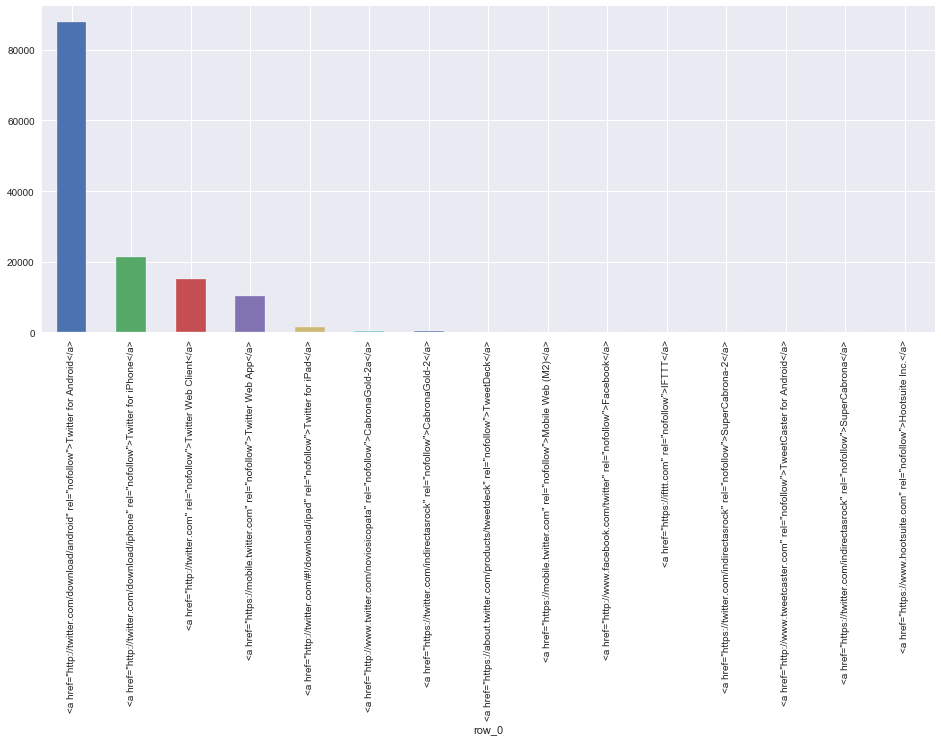

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices[:15].plot(figsize=(16, 6), kind="bar")
devices[:15]

C:\Users\Alexis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


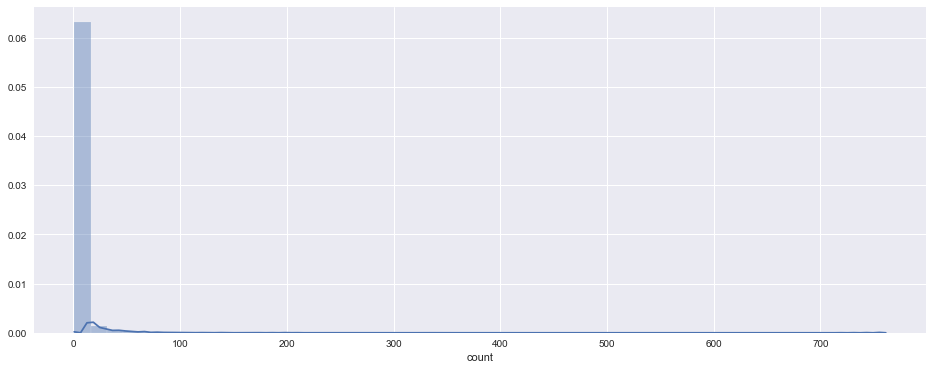

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    35055.000
mean         3.932
std         13.048
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        761.000
Name: count, dtype: float64

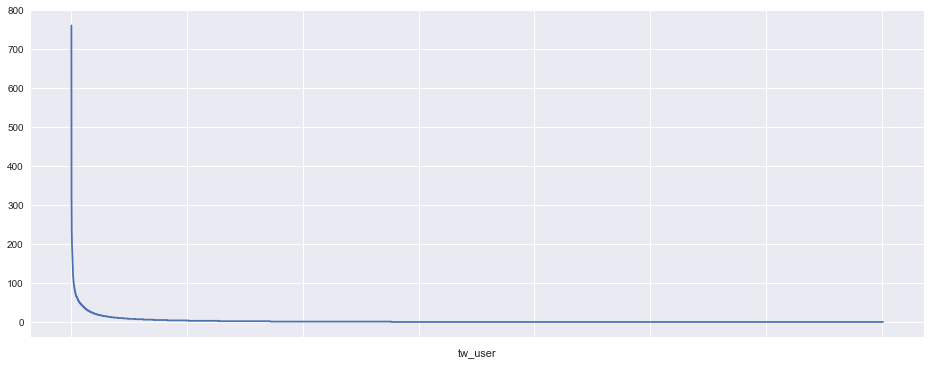

In [8]:
ids_freqs.plot(figsize=(16, 6))

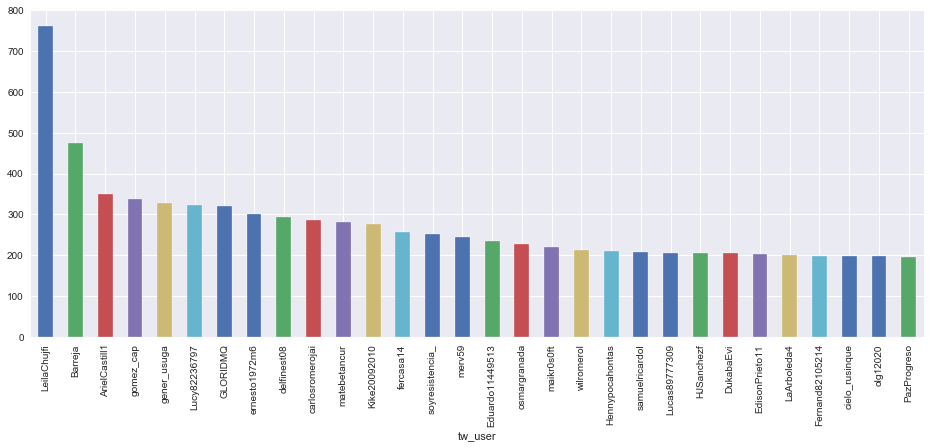

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
LeilaChujfi        761
Barreja            474
ArielCastill1      350
gomez_cap          337
gener_usuga        329
Lucy82236797       324
GLORIDMQ           320
ernesto1972m6      301
delfinest08        293
carlosromerojai    286
matebetancur       281
Kike20092010       277
fercasa14          256
soyresistencia_    252
merv59             244
Eduardo11449513    236
osmargranada       228
maikr0s0ft         221
wilromerol         212
Hennypocahontas    211
samuelricardol     209
Lucas89777309      206
HJSanchezf         205
DukabaEvi          205
EdisonPrieto11     202
LaArboleda4        200
Fernand82105214    199
cielo_rusinque     198
olg12020           198
PazProgreso        197
JoseNorbertoCa1    196
Ramiro6668         194
CarlosDuvanSal1    192
FabianSanabriaS    189
davamara16         186
OctavioLopezSie    184
kalimann56         184
henry_guarnizo     183
Yarokamena         182
Fernand80369012    176
NayibeOrdonez      174
akanesita01        173
Hachecea1          172
Ana

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

4706

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 4716


# Clustering Nexos¶


In [14]:
# Tabla de ocurrencia de menciones por tuit
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns[2] ]), columns="count").sort_values(ascending=False, by="count")

In [15]:
top_n=300

In [16]:
ments_ids_top=list(id_ments.index[:top_n])

In [17]:
mntns_top_ocurr=np.array([[cand in tw_mntns[2] for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [18]:
mntns_top_ocurr.shape

(137844, 300)

In [19]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [20]:
# twtxt_ids=[txt_id[0] for txt_id in tw_text] # Id del tuit con el texto
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top, index=tw_id)

MafeCarrascal      8191
Marianiniecheve    7145
CathyJuvinao       6292
VillegasPoljak     4665
ClaudiaLopez       4573
cielo_rusinque     3521
angelamrobledo     3401
FiscaliaCol        2826
FabianSanabriaS    2780
Uriasv             2757
AngelicaLozanoC    2359
DanielSamperO      2303
gener_usuga        2223
GustavoBolivar     1916
PoliciaColombia    1632
OliverLopezCano    1627
JERobledo          1555
petrogustavo       1553
ANNALVAREZG        1529
NoticiasUno        1489
dtype: int64


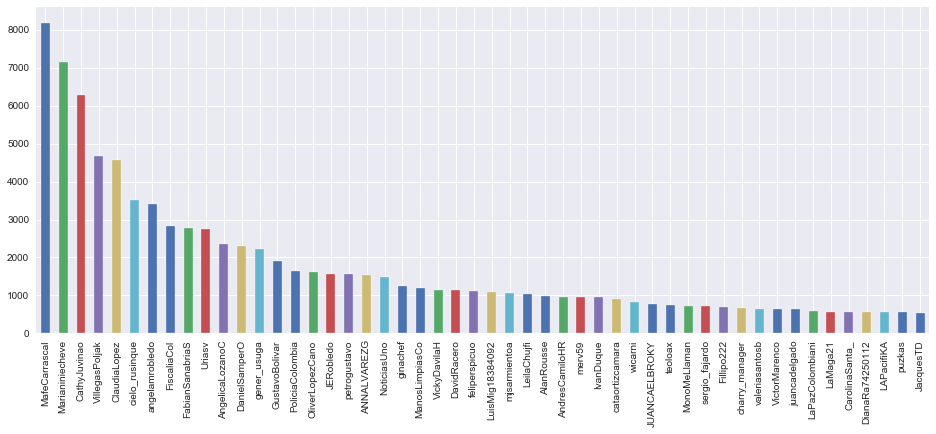

In [21]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

In [22]:
# mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

In [23]:
# #max_d = 10
# plt.figure(figsize=(10,100))
# #plt.figure()
# dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
# #plt.axhline(y=max_d, c='k')
# plt.title('Ward Link Dendrogram por tweets')
# plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
# plt.show()

# Relaciones de cuentas

In [24]:
directed_graph_df=df_mntns_top_ocurr.groupby(tw_user).aggregate(sum)

In [25]:
mntns_ward_usr= hierarchy.linkage(directed_graph_df.transpose(), 'ward')

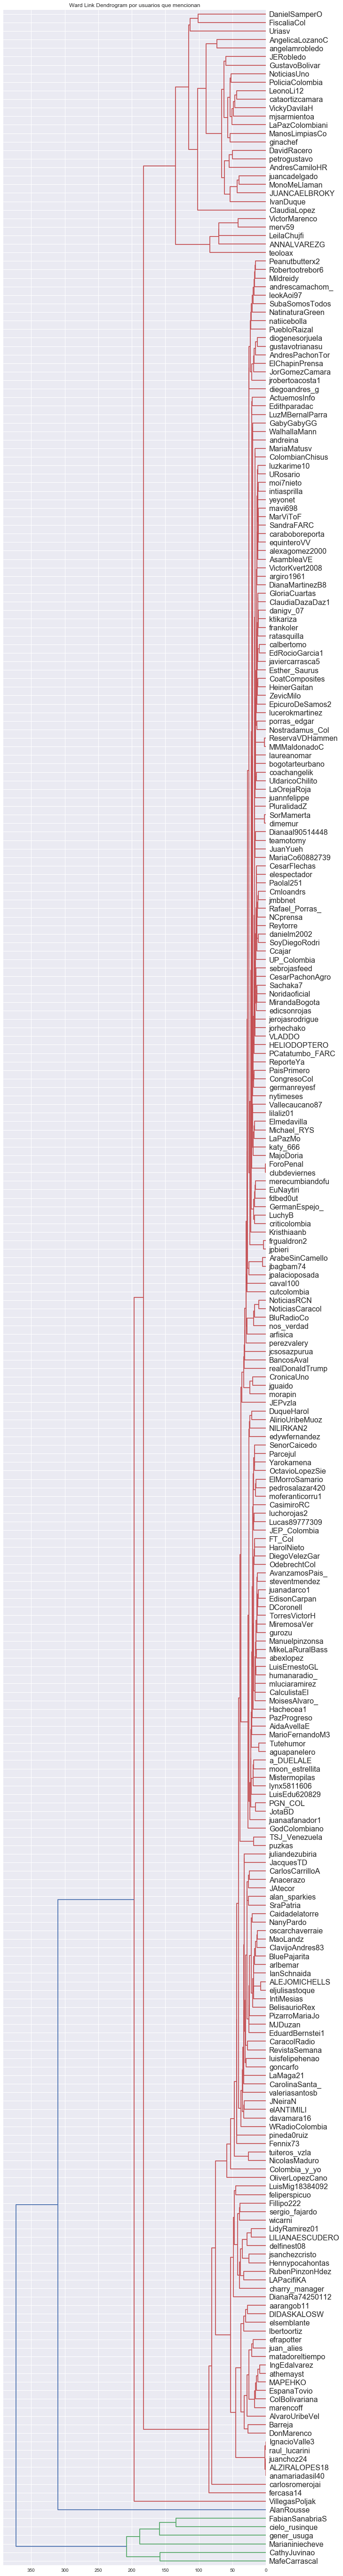

In [26]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward_usr,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram por usuarios que mencionan')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [27]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores tuiteros

LeilaChujfi        659.0
Barreja            500.0
merv59             395.0
GLORIDMQ           344.0
ernesto1972m6      309.0
gener_usuga        295.0
ArielCastill1      285.0
Lucy82236797       282.0
matebetancur       268.0
gomez_cap          265.0
Kike20092010       250.0
fercasa14          244.0
olg12020           231.0
Eduardo11449513    228.0
osmargranada       227.0
JoseNorbertoCa1    214.0
ANNALVAREZG        214.0
AnakareriNannaE    213.0
Hennypocahontas    211.0
samuelricardol     211.0
wilromerol         210.0
CarlosDuvanSal1    209.0
FabianSanabriaS    208.0
LaArboleda4        205.0
Ramiro6668         203.0
PazProgreso        203.0
OctavioLopezSie    201.0
HJSanchezf         198.0
Fernand80369012    198.0
cielo_rusinque     194.0
soyresistencia_    191.0
henry_guarnizo     188.0
Lucas89777309      183.0
kalimann56         171.0
maikr0s0ft         167.0
chinvila23         166.0
DukabaEvi          164.0
bedoyarendon       163.0
mjrmora            162.0
wicarni            159.0


In [28]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más tuiteados

MafeCarrascal      8191.0
Marianiniecheve    7145.0
CathyJuvinao       6292.0
VillegasPoljak     4665.0
ClaudiaLopez       4573.0
cielo_rusinque     3521.0
angelamrobledo     3401.0
FiscaliaCol        2826.0
FabianSanabriaS    2780.0
Uriasv             2757.0
AngelicaLozanoC    2359.0
DanielSamperO      2303.0
gener_usuga        2223.0
GustavoBolivar     1916.0
PoliciaColombia    1632.0
OliverLopezCano    1627.0
JERobledo          1555.0
petrogustavo       1553.0
ANNALVAREZG        1529.0
NoticiasUno        1489.0
ginachef           1257.0
ManosLimpiasCo     1198.0
VickyDavilaH       1152.0
DavidRacero        1138.0
feliperspicuo      1104.0
LuisMig18384092    1096.0
mjsarmientoa       1059.0
LeilaChujfi        1027.0
AlanRousse          979.0
AndresCamiloHR      969.0
merv59              963.0
IvanDuque           951.0
cataortizcamara     893.0
wicarni             838.0
JUANCAELBROKY       761.0
teoloax             742.0
MonoMeLlaman        732.0
sergio_fajardo      717.0
Fillipo222  

# Temporalidad

In [29]:
tw_fechas_df=pd.DataFrame(np.column_stack([tw_user,tw_date]))
tw_fechas_df.columns=["user","date_tweet"]
tw_fechas_df["date_tweet"]=pd.to_datetime(tw_fechas_df['date_tweet'], utc=True)#.tz_convert('US/Eastern')
tw_fechas_df.set_index('date_tweet', inplace=True)#.tz_convert('US/Eastern')
tw_fechas_df.index=tw_fechas_df.index.tz_convert('US/Eastern')
tw_fechas_df["ocurr"]=1

In [30]:
time_sample="600S"

In [31]:
tot_tw_fechas=tw_fechas_df.ocurr.resample(time_sample).sum()

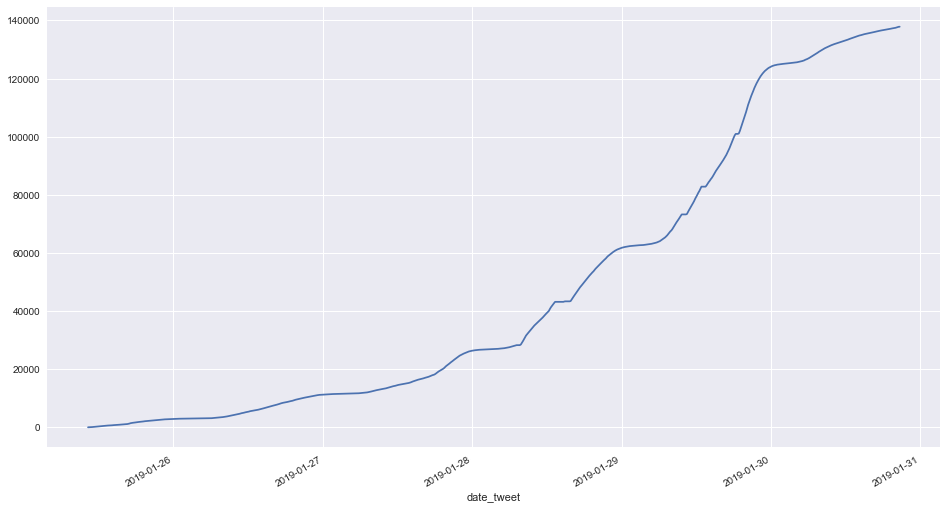

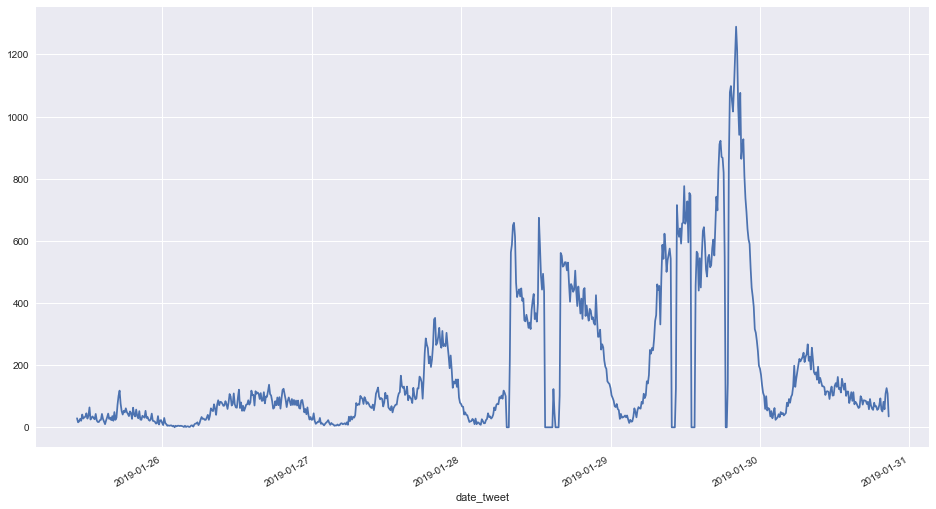

In [32]:
plt.figure(figsize=(16,9))
tot_tw_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_tw_fechas.plot()#kind="bar")
plt.show()

In [33]:
mayor_tweeters=list(directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:10])

In [34]:
tw_fechas_df_top=tw_fechas_df[tw_fechas_df.user.isin(mayor_tweeters)]
#tw_fechas_df_filt.head(20)

In [35]:
twits_filt=pd.crosstab(index=tw_fechas_df_top.index,
                  columns=tw_fechas_df_top["user"])
twits_filt=twits_filt.resample(time_sample).sum()

user
LeilaChujfi      761
Barreja          474
ArielCastill1    350
gomez_cap        337
gener_usuga      329
Lucy82236797     324
GLORIDMQ         320
ernesto1972m6    301
matebetancur     281
merv59           244
dtype: int64

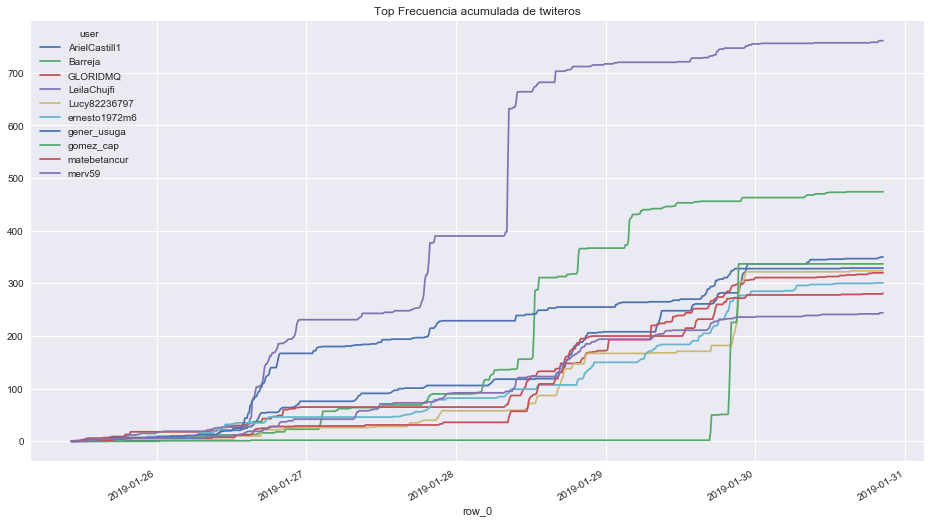

In [36]:
twits_filt.cumsum().plot(figsize=(16,9), title=("Top Frecuencia acumulada de twiteros"))
twits_filt.sum(axis=0).sort_values(ascending=False)[:10]

In [37]:
top_ments_df=df_mntns_top_ocurr.copy()*1
top_ments_df.index=tw_fechas_df.index
# top_ments_df.head(20)

In [38]:
top_ments_df_day=top_ments_df.iloc[:,:10].resample(time_sample).sum()
top_ments_df_day.sum(axis=0)

MafeCarrascal      8191
Marianiniecheve    7145
CathyJuvinao       6292
VillegasPoljak     4665
ClaudiaLopez       4573
cielo_rusinque     3521
angelamrobledo     3401
FiscaliaCol        2826
FabianSanabriaS    2780
Uriasv             2757
dtype: int64

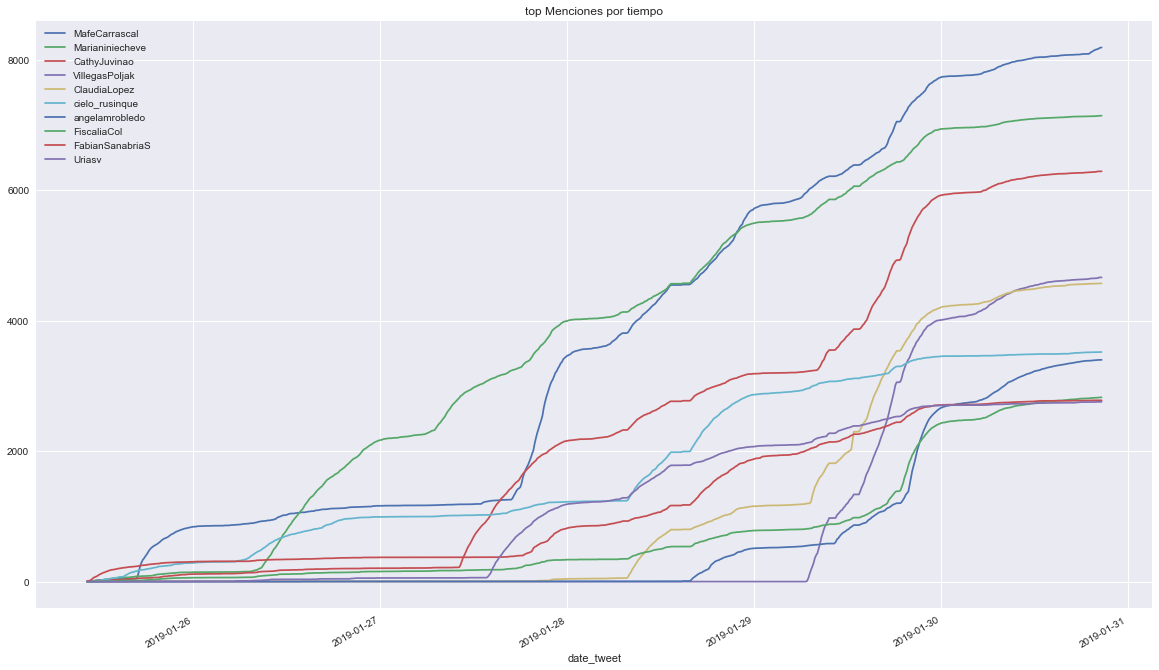

In [39]:
top_ments_df_day.cumsum().plot(figsize=(20,12), title="top Menciones por tiempo")
# (tot_tw_fechas.cumsum()*max(top_ments_df_day.sum(axis=0))/max(tot_tw_fechas.cumsum())).plot(color="black", linestyle='dashed')#kind="bar")

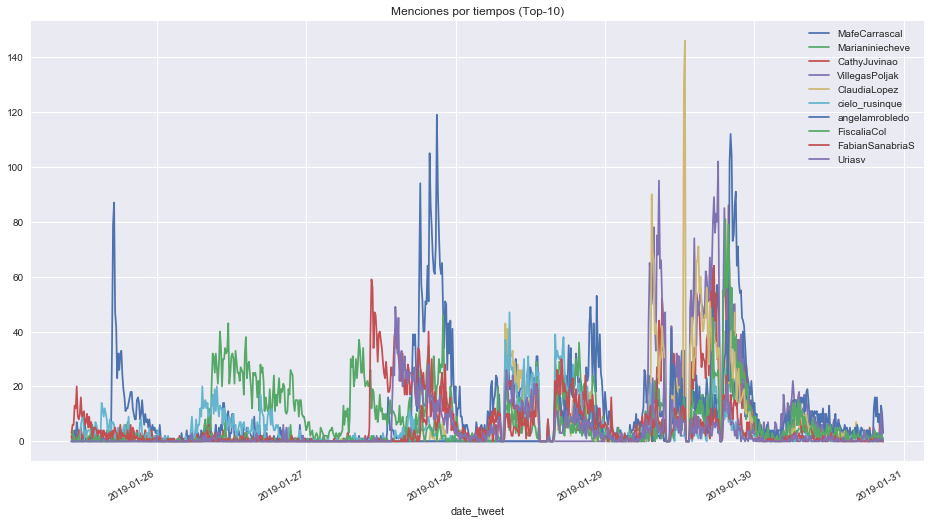

In [40]:
top_ments_df_day.plot(figsize=(16,9), title="Menciones por tiempos (Top-10)")

# Grafos

In [41]:
mat_size=40
graph_mat=directed_graph_df.loc[directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:mat_size],
                                directed_graph_df.sum(axis=0).sort_values(ascending=False).index[:mat_size]
                               ]
graph_mat.head()

,MafeCarrascal,Marianiniecheve,CathyJuvinao,VillegasPoljak,ClaudiaLopez,cielo_rusinque,angelamrobledo,FiscaliaCol,FabianSanabriaS,Uriasv,...,merv59,IvanDuque,cataortizcamara,wicarni,JUANCAELBROKY,teoloax,MonoMeLlaman,sergio_fajardo,Fillipo222,charry_manager
LeilaChujfi,9.0,19.0,3.0,0.0,0.0,51.0,5.0,10.0,13.0,7.0,...,23.0,8.0,1.0,3.0,6.0,14.0,10.0,1.0,5.0,4.0
Barreja,5.0,16.0,0.0,0.0,1.0,19.0,2.0,7.0,18.0,8.0,...,21.0,5.0,1.0,0.0,5.0,10.0,6.0,2.0,0.0,7.0
merv59,3.0,24.0,1.0,0.0,1.0,23.0,1.0,2.0,5.0,2.0,...,25.0,3.0,0.0,0.0,3.0,11.0,2.0,0.0,0.0,0.0
GLORIDMQ,7.0,16.0,4.0,0.0,3.0,32.0,4.0,4.0,10.0,4.0,...,5.0,5.0,2.0,1.0,6.0,4.0,5.0,2.0,5.0,4.0
ernesto1972m6,13.0,26.0,9.0,0.0,5.0,11.0,2.0,4.0,2.0,2.0,...,6.0,5.0,2.0,1.0,1.0,0.0,3.0,0.0,1.0,2.0


In [42]:
graph_df=graph_mat.melt()
graph_df.columns=["tw_para", "freq"]
graph_df["tw_de"]=[usr for i in range(int(len(graph_df)/len(graph_mat.index)))for usr in list(graph_mat.index)]
graph_df=graph_df.loc[:,["tw_de","tw_para","freq"]]

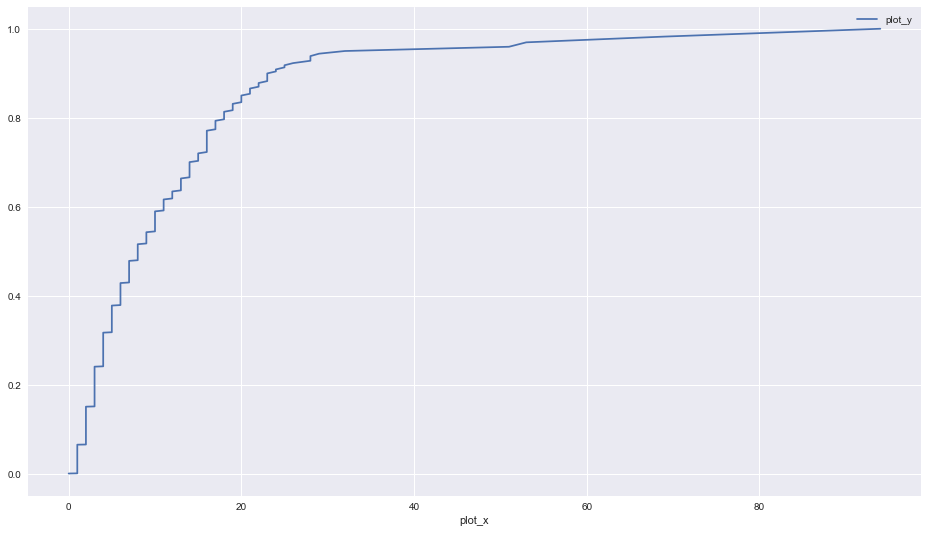

In [43]:
plot_x=np.array(list(graph_df.freq.sort_values(ascending=True)))
plot_y=np.cumsum(plot_x)/sum(plot_x)
cum_freq=pd.DataFrame({"plot_x":plot_x,
                       "plot_y":plot_y})
cum_freq.plot(x="plot_x",
              y="plot_y",
             figsize=(16,9))

In [44]:
min_crit_tw=cum_freq[cum_freq.plot_y>=.4].iloc[0,0]
graph_df_filt=graph_df.loc[graph_df.freq>=min_crit_tw,:]
mx_fr=max(graph_df_filt.freq)
print(min_crit_tw)
print(len(graph_df_filt))
graph_df_filt.sort_values("freq",ascending=False)#.head(20)

6.0
269


,tw_de,tw_para,freq
485,gener_usuga,gener_usuga,94.0
342,FabianSanabriaS,FabianSanabriaS,69.0
1080,LeilaChujfi,LeilaChujfi,53.0
200,LeilaChujfi,cielo_rusinque,51.0
203,GLORIDMQ,cielo_rusinque,32.0
1082,merv59,LeilaChujfi,29.0
229,cielo_rusinque,cielo_rusinque,28.0
47,Lucy82236797,Marianiniecheve,28.0
488,matebetancur,gener_usuga,28.0
44,ernesto1972m6,Marianiniecheve,26.0


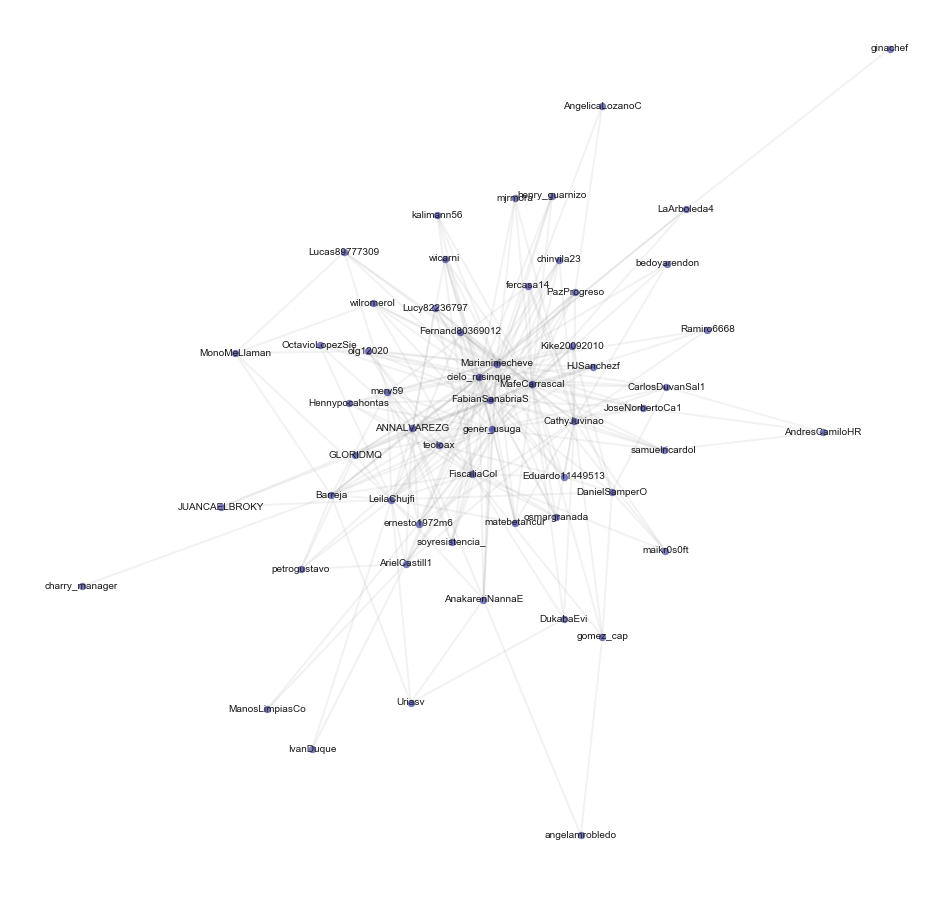

In [45]:
G_2= nx.Graph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in graph_df_filt.iterrows():
    G_2.add_edge(elrow[0], elrow[1])

pos_2 = nx.layout.spring_layout(G_2)

plt.figure(figsize=(16,16))
edges = nx.draw_networkx_edges(G_2, pos_2, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_2, pos_2, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_2, pos_2, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

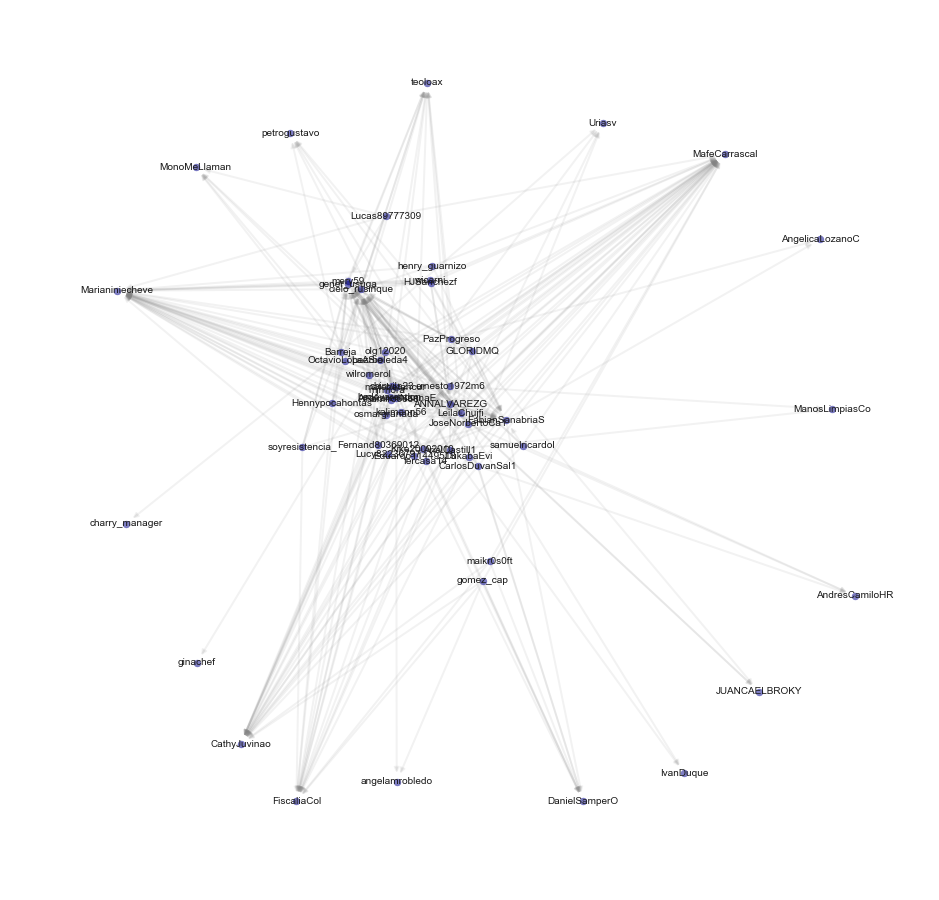

In [46]:
plt.figure(figsize=(16,16))
G_1= nx.DiGraph()
for i, elrow in graph_df_filt.iterrows():
    G_1.add_edge(elrow[0], elrow[1])

pos_1 = nx.layout.spring_layout(G_1)

edges = nx.draw_networkx_edges(G_1, pos_1, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_1, pos_1, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_1, pos_1, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

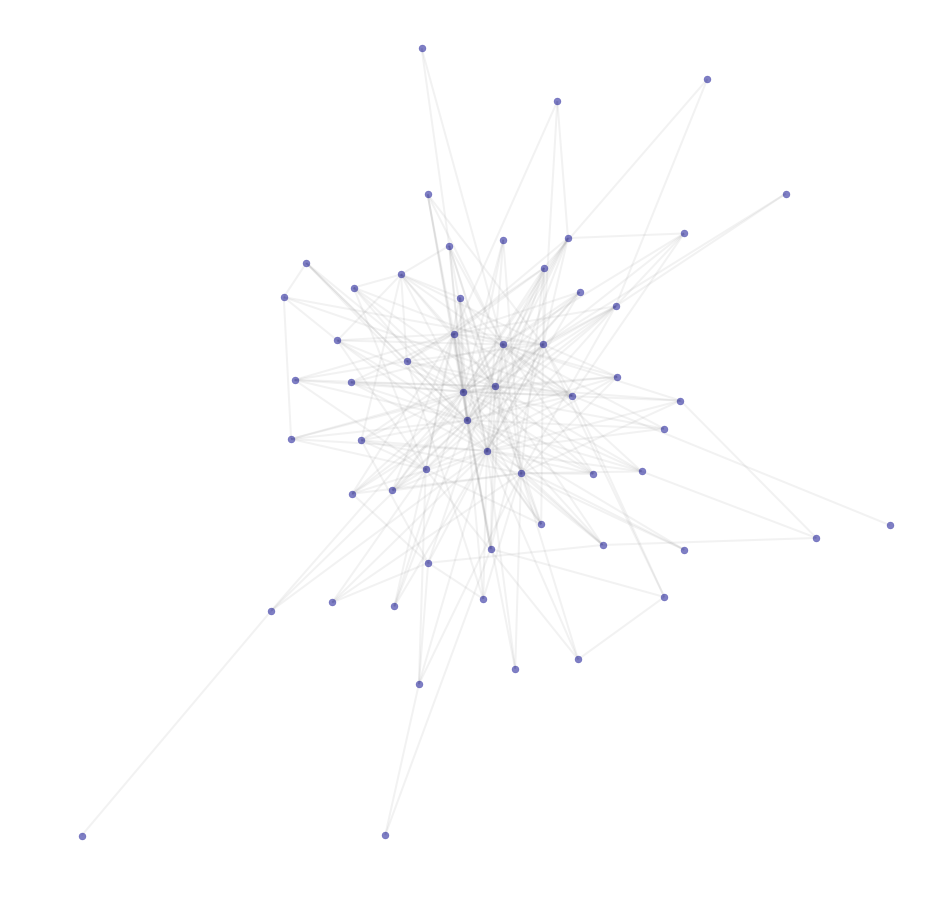

In [47]:
plt.figure(figsize=(16,16))
G_3= nx.Graph()
for i, elrow in graph_df_filt.iterrows():
    G_3.add_edge(elrow[0], elrow[1])

pos_3 = nx.layout.spring_layout(G_3)

edges = nx.draw_networkx_edges(G_3, pos_3, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_3, pos_3, node_size=50, node_color='darkblue', alpha=.5)
# labels = nx.draw_networkx_labels(G_3, pos_3, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()